<a href="https://colab.research.google.com/github/kbunwong/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import seaborn as sns
import yfinance as yf
import datetime as dt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
stock = "POWERGRID.NS"

start = dt.datetime(2000, 1, 1)
#end = dt.datetime.now()
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.385571,35.250696,26.767993,28.908790,855215656
2007-10-08,30.727671,33.480123,30.534515,33.480123,126671715
2007-10-09,32.820187,33.109918,29.085864,30.743773,116725709
2007-10-10,33.126003,33.802045,32.836272,33.673274,67931378
2007-10-11,36.828129,38.630905,32.836270,38.630905,106320954


In [ ]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2024-10-25,307.732239,313.286633,305.247396,313.286633,12979410
2024-10-28,310.168365,312.263463,302.811258,306.465456,9610615
2024-10-29,312.360901,312.994319,306.124408,308.024603,15856332
2024-10-30,310.314575,317.087006,308.657993,310.411997,14498110
2024-10-31,312.604523,314.456007,309.729904,312.214747,9900390


In [ ]:
df.shape  # (column,row)

(4208, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [ ]:
df.isnull().sum() # to see if there are missing values

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [ ]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.255946,80.286305,78.238144,79.292804,1.188963e+07
std,63.621687,64.365266,62.829875,63.603316,2.061999e+07
min,18.908407,20.212435,16.952366,20.114632,0.000000e+00
25%,36.349707,36.923182,35.812875,36.386933,4.799653e+06
50%,55.232325,55.870065,54.493162,55.338354,8.344398e+06
75%,82.704771,83.691956,81.724072,82.727272,1.362032e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [ ]:
df = df.reset_index()

In [ ]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.385571,35.250696,26.767993,28.908790,855215656
1,2007-10-08,30.727671,33.480123,30.534515,33.480123,126671715
2,2007-10-09,32.820187,33.109918,29.085864,30.743773,116725709
3,2007-10-10,33.126003,33.802045,32.836272,33.673274,67931378
4,2007-10-11,36.828129,38.630905,32.836270,38.630905,106320954


In [ ]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [ ]:
data01 = df.to_csv('Powergrid.csv')

In [ ]:
data01 = pd.read_csv('Powergrid.csv')

In [ ]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.38557052612305,35.25069620600811,26.767993469907726,28.90878995513679,855215656
2,1,2007-10-08,30.727670669555664,33.480122790770764,30.534515292099577,33.480122790770764,126671715
3,2,2007-10-09,32.820186614990234,33.10991757581961,29.085864324363808,30.74377339068815,116725709
4,3,2007-10-10,33.12600326538086,33.80204486122549,32.83627240041195,33.67327388987095,67931378


In [ ]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data = [go.Candlestick(x = data01['Date'],
                open = data01['Open'],
                high = data01['High'],
                low = data01['Low'],
                close = data01['Close'])])

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

#Candlesticks = df[['Date', 'Open', 'High', 'Low', 'Close']]

In [ ]:
df = df.drop(['Date'], axis = 1)

<ipython-input-25-0cad584de5c9>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.385571,35.250696,26.767993,28.908790,855215656
1,30.727671,33.480123,30.534515,33.480123,126671715
2,32.820187,33.109918,29.085864,30.743773,116725709
3,33.126003,33.802045,32.836272,33.673274,67931378
4,36.828129,38.630905,32.836270,38.630905,106320954


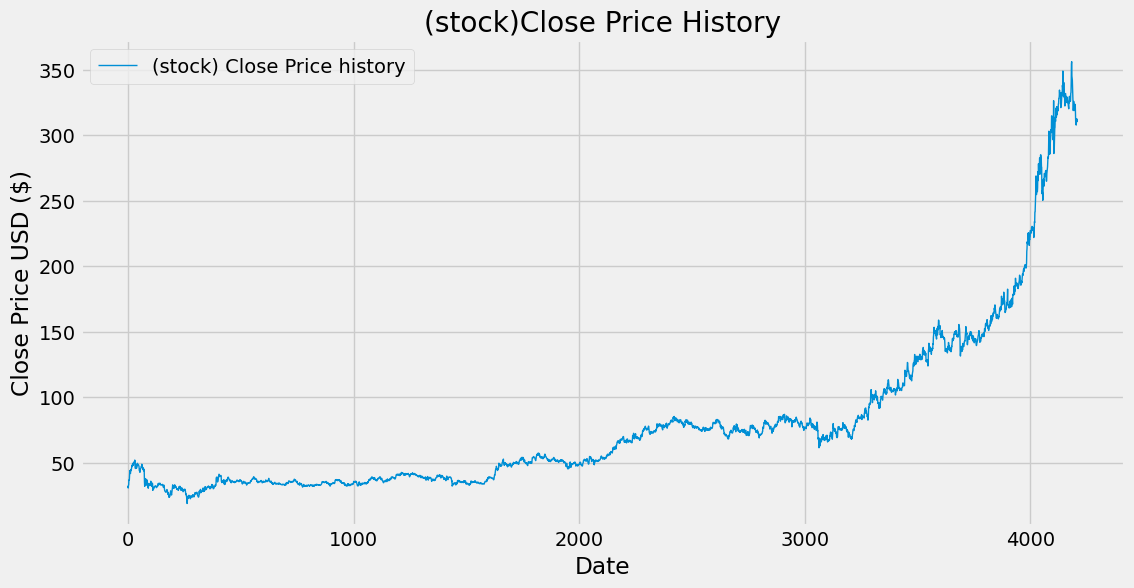

In [ ]:
# track price over time

plt.figure(figsize = (12, 6))
#plt.plot(df['Close'], label = 'Close Price history', linewidth = 2)
plt.plot(df['Close'], label = f'(stock) Close Price history', linewidth = 1)
#plt.xlabel('Date')
plt.title(f'(stock)' 'Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()

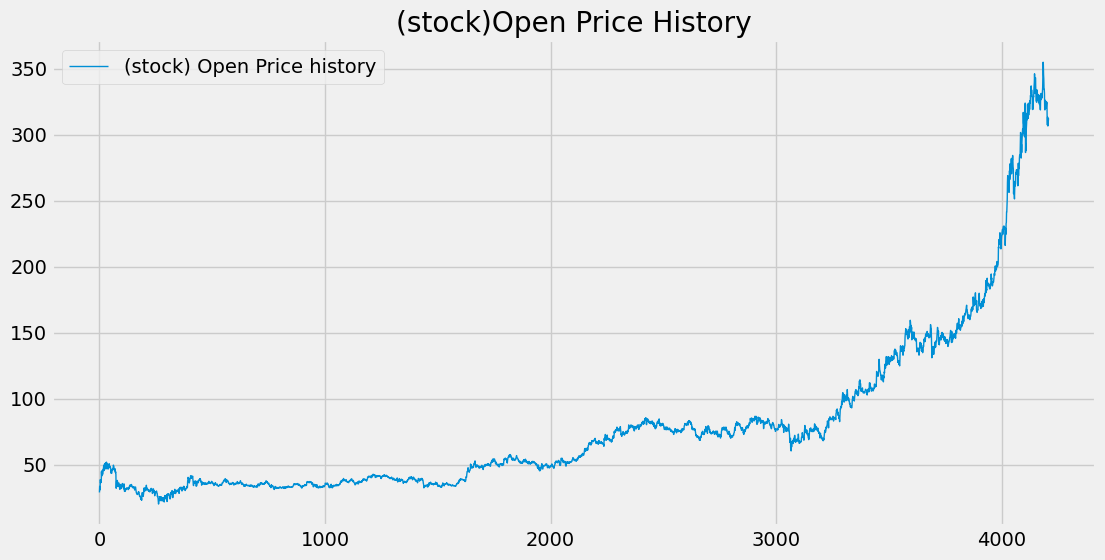

In [ ]:
plt.figure(figsize = (12, 6))
#plt.plot(df['Close'], label = 'Close Price history', linewidth = 2)
plt.plot(df['Open'], label = f'(stock) Open Price history', linewidth = 1)
#plt.xlabel('Date')
plt.title(f'(stock)' 'Open Price History')
#plt.xlabel('Date')
#plt.ylabel('Open Price USD ($)')
#plt.legend(loc = 'upper left')
plt.legend()
plt.show()

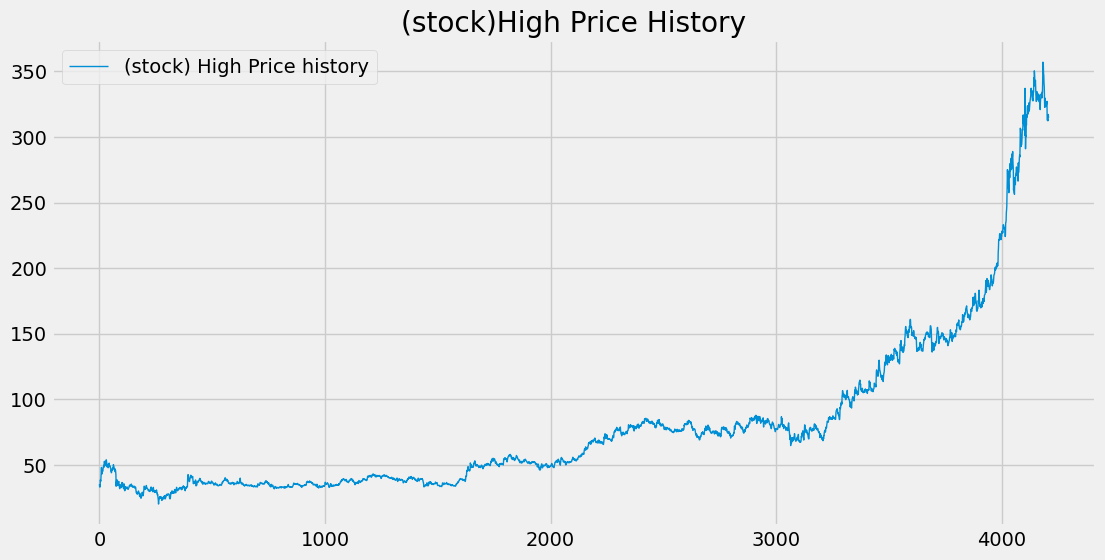

In [ ]:
plt.figure(figsize = (12, 6))
#plt.plot(df['Close'], label = 'Close Price history', linewidth = 2)
plt.plot(df['High'], label = f'(stock) High Price history', linewidth = 1)
#plt.xlabel('Date')
plt.title(f'(stock)' 'High Price History')
#plt.xlabel('Date')
#plt.ylabel('Open Price USD ($)')
#plt.legend(loc = 'upper left')
plt.legend()
plt.show()

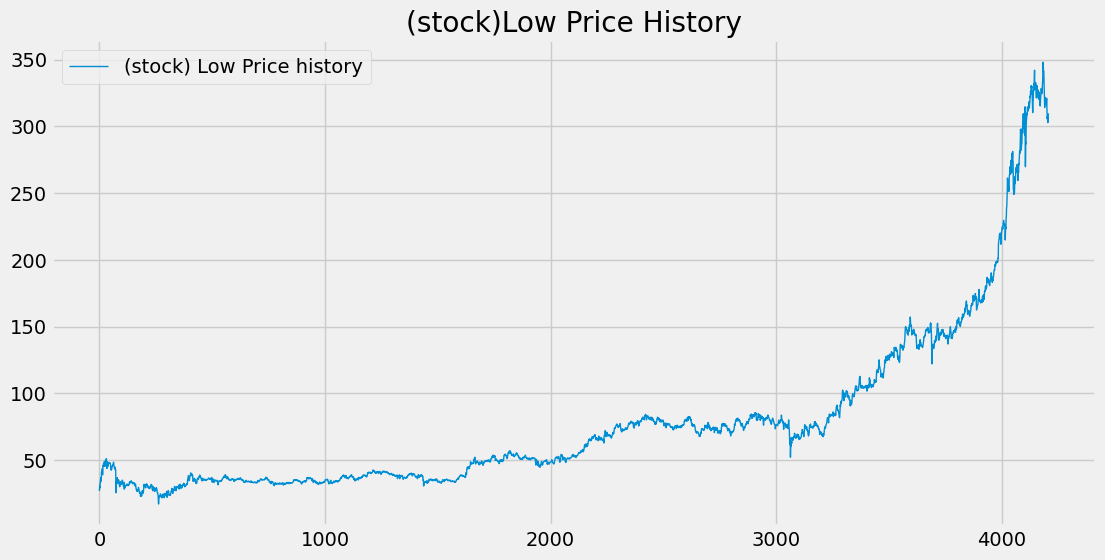

In [ ]:
plt.figure(figsize = (12, 6))
#plt.plot(df['Close'], label = 'Close Price history', linewidth = 2)
plt.plot(df['Low'], label = f'(stock) Low Price history', linewidth = 1)
#plt.xlabel('Date')
plt.title(f'(stock)' 'Low Price History')
#plt.xlabel('Date')
#plt.ylabel('Open Price USD ($)')
#plt.legend(loc = 'upper left')
plt.legend()
plt.show()

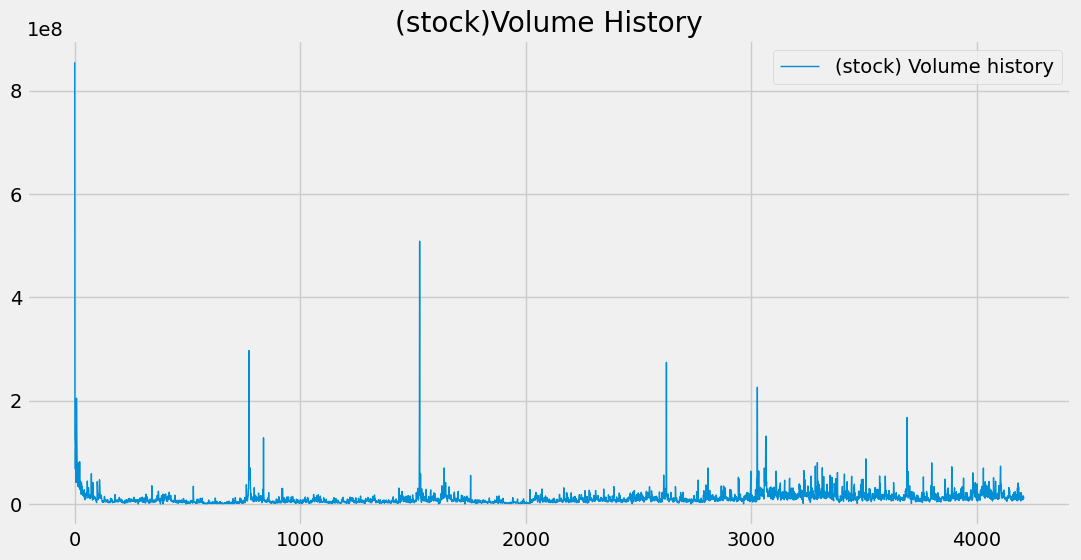

In [ ]:
plt.figure(figsize = (12, 6))
#plt.plot(df['Close'], label = 'Close Price history', linewidth = 2)
plt.plot(df['Volume'], label = f'(stock) Volume history', linewidth = 1)
#plt.xlabel('Date')
plt.title(f'(stock)' 'Volume History')
#plt.xlabel('Date')
#plt.ylabel('Open Price USD ($)')
#plt.legend(loc = 'upper left')
plt.legend()
plt.show()

In [ ]:
# Moving Average
[10, 20, 30, 40, 50, 60, 70, 80, 90]

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[1:6])/5)
#moving = df.Close.rolling(10).mean()

40.0


In [ ]:
import pandas as pd

#df01 = pd.read_csv('Powergrid.csv')
df01 = pd.DataFrame(temp_data)

In [ ]:
df01

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90


In [ ]:
#moving = df.Close.rolling(10).mean()
df01.rolling(5).mean()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
4203,317.962064,322.349053,314.980245,320.187721,12233997.40
4204,315.681841,320.583342,312.618167,318.051717,11586948.72
4205,313.592610,318.168646,310.238550,315.282320,11173186.40


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

In [ ]:
ma200


Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,324.993563
4204,325.235133
4205,325.471086
4206,325.670629


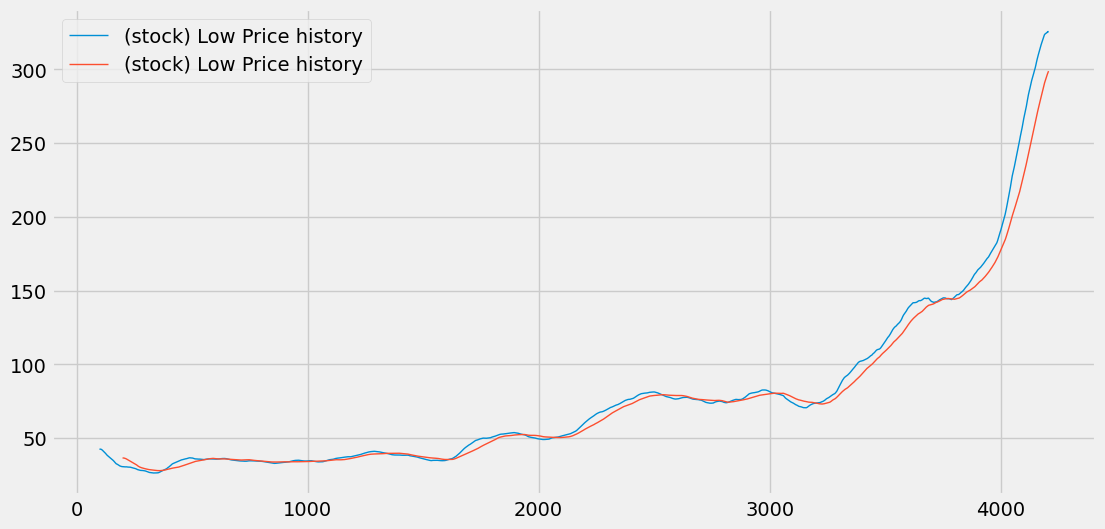

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(ma100, label = f'(stock) High Price history', linewidth = 1)
plt.plot(ma200, label = f'(stock) High Price history', linewidth = 1)
plt.legend()
plt.show()

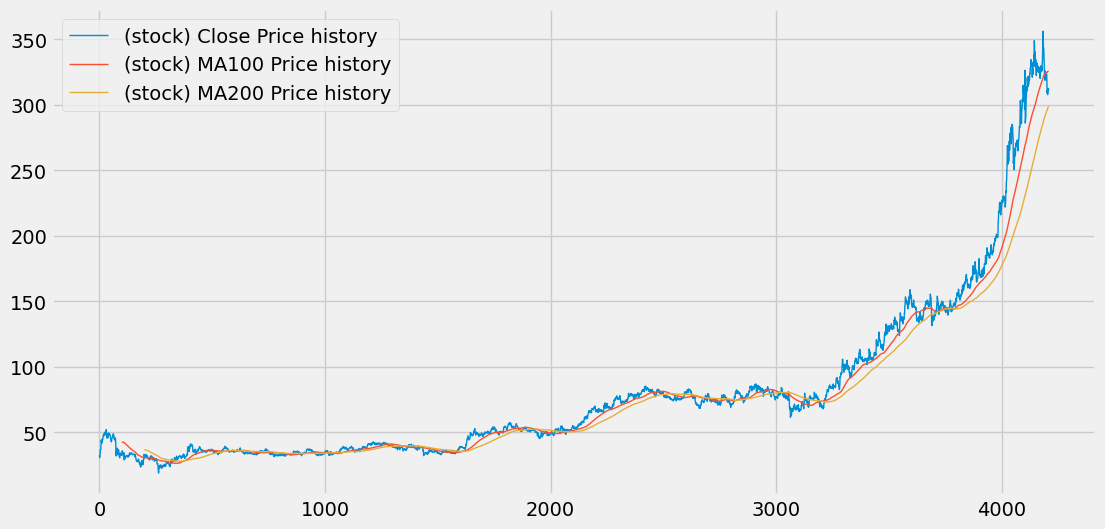

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close, label = f'(stock) Close Price history', linewidth = 1)
plt.plot(ma100, label = f'(stock) MA100 Price history', linewidth = 1)
plt.plot(ma200, label = f'(stock) MA200 Price history', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
ema100 = df.Close.ewm(span = 100, adjust = False).mean()
#ema200 = df.Close.ewm(span = 200, adjust = False).mean()


In [ ]:
ema200 = df['Close'].ewm(span = 200, adjust = False).mean()

In [ ]:
df.pct_change()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,NaN,NaN,NaN,NaN,NaN
1,-0.051193,-0.050228,1.407099e-01,0.158130,-0.851883
2,0.068099,-0.011057,-4.744306e-02,-0.081731,-0.078518
3,0.009318,0.020904,1.289426e-01,0.095288,-0.418026
4,0.111759,0.142857,-6.020223e-08,0.147227,0.565123
...,...,...,...,...,...
4203,-0.010497,0.002182,-6.344208e-03,0.019825,0.558568
4204,0.007916,-0.003266,-7.980864e-03,-0.021773,-0.259549
4205,0.007069,0.002341,1.094130e-02,0.005088,0.649877


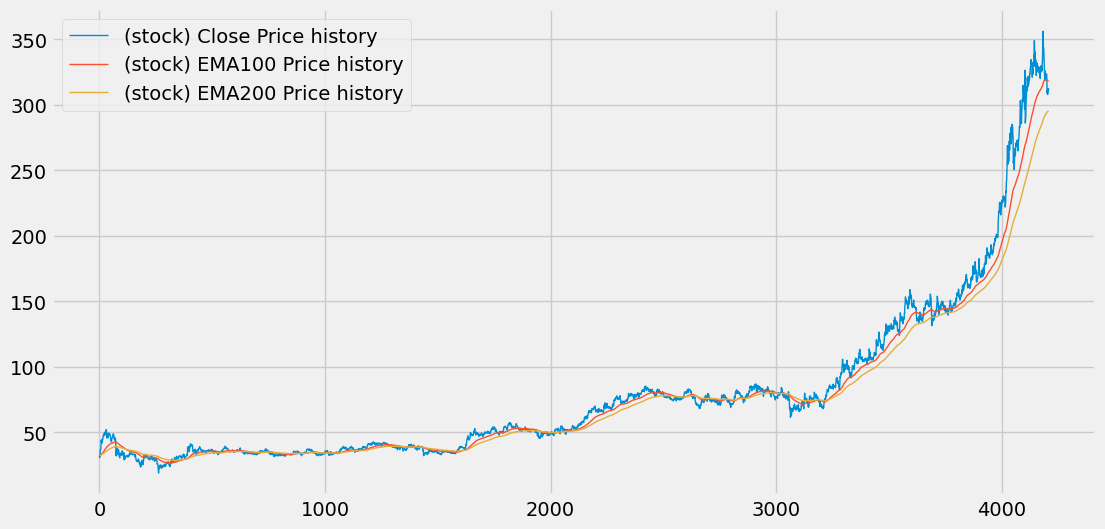

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close, label = f'(stock) Close Price history', linewidth = 1)
plt.plot(ema100, label = f'(stock) EMA100 Price history', linewidth = 1)
plt.plot(ema200, label = f'(stock) EMA200 Price history', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
# training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [ ]:
data_training.shape

(2945, 1)

In [ ]:
data_testing.shape

(1263, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)

In [ ]:
data_training_array

array([[0.19808598],
       [0.17371834],
       [0.20447393],
       ...,
       [0.9077442 ],
       [0.86000395],
       [0.87299659]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])


x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2845, 100, 1)

In [ ]:
# Model building

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential


In [ ]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))

In [ ]:
# LSTM Input -> 3D array (batch_size, time_steps, seq_len)
# LSTM 2D or 3D
# 2D -> (batch_size units)
# 3D -> (batch_size, time_steps, units)

In [ ]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 32s 272ms/step - loss: 0.0827
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 259ms/step - loss: 0.0087
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 271ms/step - loss: 0.0076
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 271ms/step - loss: 0.0075
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 265ms/step - loss: 0.0056
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 272ms/step - loss: 0.0060
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 270ms/step - loss: 0.0053
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 269ms/step - loss: 0.0054
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 275ms/step - loss: 0.0046
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 271ms/step - loss: 0.0047
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 264ms/step - loss: 0.0045
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 271ms/step - loss: 0.0045
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 272ms/step - loss: 0.0048
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 41s 269ms/step - loss: 0.0038
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
# Instead of using append, use concat to concatenate the DataFrames
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

#final_df = pd.append([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

Ticker,POWERGRID.NS
0,75.731842
1,77.275726
2,77.539818
3,77.377304
4,77.824226


In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])


x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test.shape

(1263, 100, 1)

In [ ]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step


In [ ]:
y_predicted.shape

(1263, 1)

In [ ]:
scaler.scale_

array([0.00339369])

In [ ]:
scaler_factor = 1/0.00339369
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

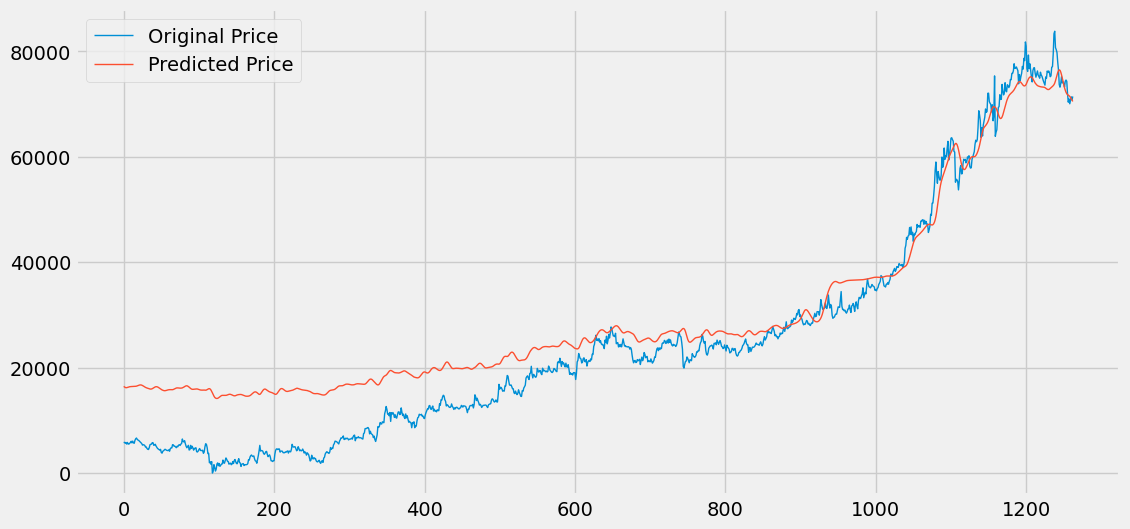

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [ ]:
model.save('stock_dl_model.h5')